# UniversalBank Data

* (1) 문제: 고객의 다양한 데이터를 기반으로 개인 대출 수락 여부 예측
* (2) 불필요하다고 판단되는 변수는 제거
* (3) 카테고리 데이터 경우 Dummy 변수(one-hot-vector로 변환)
* (4) y값 시각화
* (5) Decision Tree, KNN, Bagging, Random Forest, AdaBosst, Graident Boost 선택
* (6) Train-Test 0.25 비율로 나눈 후 학습 및 테스트
* (7) 검증 - F1_measure, Recall, Accuray 지표 활용

### Y -> Personal Loan

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
import seaborn as sns

In [6]:
input_data = pd.read_csv('UniversalBank.csv')

In [7]:
input_data

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [17]:
# 2번 문항
data = input_data.drop(['ID', 'ZIP Code'], axis= 1)

In [18]:
data

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,3,0,0,0,0,1,0
4996,30,4,15,4,0.4,1,85,0,0,0,1,0
4997,63,39,24,2,0.3,3,0,0,0,0,0,0
4998,65,40,49,3,0.5,2,0,0,0,0,1,0


In [23]:
# 3번 문항
# Education 범주형 데이터를 one - hot - vector로 변환
data = pd.get_dummies(data, columns = ['Education'], prefix = 'Education')

In [24]:
data

,Age,Experience,Income,Family,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Education_1,Education_2,Education_3
0,25,1,49,4,1.6,0,0,1,0,0,0,1,0,0
1,45,19,34,3,1.5,0,0,1,0,0,0,1,0,0
2,39,15,11,1,1.0,0,0,0,0,0,0,1,0,0
3,35,9,100,1,2.7,0,0,0,0,0,0,0,1,0
4,35,8,45,4,1.0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,0,0,0,0,1,0,0,0,1
4996,30,4,15,4,0.4,85,0,0,0,1,0,1,0,0
4997,63,39,24,2,0.3,0,0,0,0,0,0,0,0,1
4998,65,40,49,3,0.5,0,0,0,0,1,0,0,1,0


In [13]:
Y = data['Personal Loan']

In [27]:
X = data.drop('Personal Loan', axis = 1)

In [28]:
X

,Age,Experience,Income,Family,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Education_1,Education_2,Education_3
0,25,1,49,4,1.6,0,1,0,0,0,1,0,0
1,45,19,34,3,1.5,0,1,0,0,0,1,0,0
2,39,15,11,1,1.0,0,0,0,0,0,1,0,0
3,35,9,100,1,2.7,0,0,0,0,0,0,1,0
4,35,8,45,4,1.0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,0,0,0,1,0,0,0,1
4996,30,4,15,4,0.4,85,0,0,1,0,1,0,0
4997,63,39,24,2,0.3,0,0,0,0,0,0,0,1
4998,65,40,49,3,0.5,0,0,0,1,0,0,1,0


<AxesSubplot:xlabel='Personal Loan', ylabel='count'>

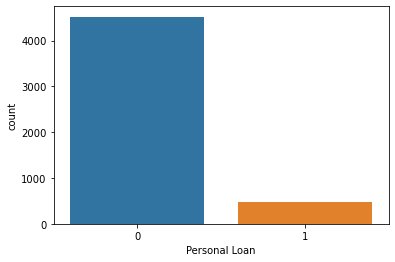

In [25]:
# 4번 문항
sns.countplot(x=Y)

----


In [26]:
from sklearn.model_selection import train_test_split

In [79]:
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y, test_size = 0.25, random_state = 20220607)

# 1) Decision Tree

In [80]:
from sklearn.tree import DecisionTreeClassifier as DT

In [81]:
dt = DT(max_depth = None)

In [82]:
dt.fit(Train_X, Train_Y)

DecisionTreeClassifier()

In [83]:
pred_Y_dt = dt.predict(Test_X)

In [84]:
pred_Y_dt

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [85]:
Test_Y

21      0
1041    0
2403    1
3521    0
2197    0
       ..
680     0
306     0
685     0
4369    0
1523    0
Name: Personal Loan, Length: 1250, dtype: int64

In [86]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [87]:
acc_dt = accuracy_score(y_true = Test_Y, y_pred = pred_Y_dt)
recall_dt = recall_score(y_true = Test_Y, y_pred = pred_Y_dt, pos_label = -0) # 우리는 Positive를 0으로 설정했음
f1_dt = f1_score(y_true = Test_Y, y_pred = pred_Y_dt, pos_label = 0)

print("Accuracy Score By DT              >> {:.3f}".format(acc_dt))
print("Recall Score By DT                >> {:.3f}".format(recall_dt))
print("F1 Measure By DT                  >> {:.3f}".format(f1_dt))

Accuracy Score By DT              >> 0.985
Recall Score By DT                >> 0.992
F1 Measure By DT                  >> 0.992


----
# 2) KNN

In [88]:
from sklearn.neighbors import KNeighborsClassifier as KNN

In [89]:
knn = KNN(n_neighbors = 5)

In [90]:
knn.fit(Train_X, Train_Y)

KNeighborsClassifier()

In [91]:
pred_Y_knn = knn.predict(Test_X)

In [92]:
pred_Y_knn

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [93]:
acc_knn = accuracy_score(y_true = Test_Y, y_pred = pred_Y_knn)
recall_knn = recall_score(y_true = Test_Y, y_pred = pred_Y_knn, pos_label = -0) # 우리는 Positive를 0으로 설정했음
f1_knn = f1_score(y_true = Test_Y, y_pred = pred_Y_knn, pos_label = 0)

print("Accuracy Score By KNN              >> {:.3f}".format(acc_knn))
print("Recall Score By KNN                >> {:.3f}".format(recall_knn))
print("F1 Measure By KNN                  >> {:.3f}".format(f1_knn))

Accuracy Score By KNN              >> 0.910
Recall Score By KNN                >> 0.980
F1 Measure By KNN                  >> 0.952


----
# 3) Random Forest

In [94]:
from sklearn.ensemble import RandomForestClassifier as RF

In [110]:
rf = RF(n_estimators = 50, max_depth = 5, random_state = 20220607)

In [111]:
rf.fit(Train_X, Train_Y)

RandomForestClassifier(max_depth=5, n_estimators=50, random_state=20220607)

In [112]:
pred_Y_rf = rf.predict(Test_X)

In [113]:
pred_Y_rf

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [114]:
acc_rf = accuracy_score(y_true = Test_Y, y_pred = pred_Y_rf)
recall_rf = recall_score(y_true = Test_Y, y_pred = pred_Y_rf, pos_label = -0) # 우리는 Positive를 0으로 설정했음
f1_rf = f1_score(y_true = Test_Y, y_pred = pred_Y_rf, pos_label = 0)

print("Accuracy Score By RF              >> {:.3f}".format(acc_rf))
print("Recall Score By RF                >> {:.3f}".format(recall_rf))
print("F1 Measure By RF                  >> {:.3f}".format(f1_rf))

Accuracy Score By RF              >> 0.972
Recall Score By RF                >> 0.997
F1 Measure By RF                  >> 0.985


----
# 4) Bagging

In [115]:
from sklearn.ensemble import BaggingClassifier as BGC

In [121]:
model = BGC(base_estimator = DT(max_depth = 7),
           n_estimators = 100,
           max_samples = 0.5, max_features = 1.0, random_state = 20220607)
model.fit(Train_X, Train_Y)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=7),
                  max_samples=0.5, n_estimators=100, random_state=20220607)

In [123]:
pred_Y_bag1 = model.predict(Test_X)

In [124]:
acc_bag1 = accuracy_score(y_true = Test_Y, y_pred = pred_Y_bag1)
recall_bag1 = recall_score(y_true = Test_Y, y_pred = pred_Y_bag1, pos_label = -0) # 우리는 Positive를 0으로 설정했음
f1_bag1 = f1_score(y_true = Test_Y, y_pred = pred_Y_bag1, pos_label = 0)

print("Accuracy Score By Bagging(1)              >> {:.3f}".format(acc_bag1))
print("Recall Score By Bagging(1)                >> {:.3f}".format(recall_bag1))
print("F1 Measure By Bagging(1)                  >> {:.3f}".format(f1_bag1))

Accuracy Score By Bagging(1)              >> 0.982
Recall Score By Bagging(1)                >> 0.995
F1 Measure By Bagging(1)                  >> 0.990


In [125]:
# n_estimators의 값을 조정
model2 = BGC(base_estimator = DT(max_depth = 7),
           n_estimators = 1000,
           max_samples = 0.5, max_features = 1.0, random_state = 20220607)
model2.fit(Train_X, Train_Y)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=7),
                  max_samples=0.5, n_estimators=1000, random_state=20220607)

In [128]:
pred_Y_bag2 = model2.predict(Test_X)

In [129]:
acc_bag2 = accuracy_score(y_true = Test_Y, y_pred = pred_Y_bag2)
recall_bag2 = recall_score(y_true = Test_Y, y_pred = pred_Y_bag2, pos_label = -0) # 우리는 Positive를 0으로 설정했음
f1_bag2 = f1_score(y_true = Test_Y, y_pred = pred_Y_bag2, pos_label = 0)

print("Accuracy Score By Bagging(2)              >> {:.3f}".format(acc_bag2))
print("Recall Score By Bagging(2)                >> {:.3f}".format(recall_bag2))
print("F1 Measure By Bagging(2)                  >> {:.3f}".format(f1_bag2))

Accuracy Score By Bagging(2)              >> 0.982
Recall Score By Bagging(2)                >> 0.996
F1 Measure By Bagging(2)                  >> 0.990


In [119]:
# max_samples의 값을 조정
model3 = BGC(base_estimator = DT(max_depth = 7),
           n_estimators = 1000,
           max_samples = 0.8, max_features = 1.0, random_state = 20220607)

In [130]:
model3.fit(Train_X, Train_Y)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=7),
                  max_samples=0.8, n_estimators=1000, random_state=20220607)

In [132]:
pred_Y_bag3 = model3.predict(Test_X)

In [133]:
acc_bag3 = accuracy_score(y_true = Test_Y, y_pred = pred_Y_bag3)
recall_bag3 = recall_score(y_true = Test_Y, y_pred = pred_Y_bag3, pos_label = -0) # 우리는 Positive를 0으로 설정했음
f1_bag3 = f1_score(y_true = Test_Y, y_pred = pred_Y_bag3, pos_label = 0)

print("Accuracy Score By Bagging(3)              >> {:.3f}".format(acc_bag3))
print("Recall Score By Bagging(3)                >> {:.3f}".format(recall_bag3))
print("F1 Measure By Bagging(3)                  >> {:.3f}".format(f1_bag3))

Accuracy Score By Bagging(3)              >> 0.980
Recall Score By Bagging(3)                >> 0.996
F1 Measure By Bagging(3)                  >> 0.989


In [120]:
# max_features의 값을 조정
model4 = BGC(base_estimator = DT(max_depth = 7),
           n_estimators = 1000,
           max_samples = 0.8, max_features = 0.8, random_state = 20220607)

In [134]:
model4.fit(Train_X, Train_Y)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=7),
                  max_features=0.8, max_samples=0.8, n_estimators=1000,
                  random_state=20220607)

In [135]:
pred_Y_bag4 = model4.predict(Test_X)

In [136]:
acc_bag4 = accuracy_score(y_true = Test_Y, y_pred = pred_Y_bag4)
recall_bag4 = recall_score(y_true = Test_Y, y_pred = pred_Y_bag4, pos_label = -0) # 우리는 Positive를 0으로 설정했음
f1_bag4 = f1_score(y_true = Test_Y, y_pred = pred_Y_bag4, pos_label = 0)

print("Accuracy Score By Bagging(4)              >> {:.3f}".format(acc_bag4))
print("Recall Score By Bagging(4)                >> {:.3f}".format(recall_bag4))
print("F1 Measure By Bagging(4)                  >> {:.3f}".format(f1_bag4))

Accuracy Score By Bagging(4)              >> 0.982
Recall Score By Bagging(4)                >> 0.997
F1 Measure By Bagging(4)                  >> 0.990


----
# 5) AdaBoost

In [138]:
from sklearn.ensemble import AdaBoostClassifier as ADB

----
# 6) Gradient Boost

In [139]:
from sklearn.ensemble import GradientBoostingClassifier as GB